In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''
end = '.c8'
def convert_to_utf8(directory):
    # 遍历指定目录
    for filename in os.listdir(directory):
        # 检查文件后缀是否为
        if filename.endswith(end):
            file_path = os.path.join(directory, filename)
            try:
                # 以GB2312编码读取文件
                with open(file_path, 'r', encoding='gb2312') as file:
                    content = file.read()
                
                # 转换为UTF-8编码并保存为同名txt文件
                new_file_path = os.path.join(directory, filename.replace(end, '.txt'))
                with open(new_file_path, 'w', encoding='utf-8') as new_file:
                    new_file.write(content)
                print(f"文件 {filename} 已转换并保存为 {new_file_path}")
            except UnicodeDecodeError:
                print(f"文件 {filename} 编码不是GB2312，跳过转换。")
            except Exception as e:
                print(f"处理文件 {filename} 时发生错误: {e}")

# 指定要处理的目录
directory = './'# 替换为你的目录路径
convert_to_utf8(directory)
'''

'\nend = \'.c8\'\ndef convert_to_utf8(directory):\n    # 遍历指定目录\n    for filename in os.listdir(directory):\n        # 检查文件后缀是否为\n        if filename.endswith(end):\n            file_path = os.path.join(directory, filename)\n            try:\n                # 以GB2312编码读取文件\n                with open(file_path, \'r\', encoding=\'gb2312\') as file:\n                    content = file.read()\n                \n                # 转换为UTF-8编码并保存为同名txt文件\n                new_file_path = os.path.join(directory, filename.replace(end, \'.txt\'))\n                with open(new_file_path, \'w\', encoding=\'utf-8\') as new_file:\n                    new_file.write(content)\n                print(f"文件 {filename} 已转换并保存为 {new_file_path}")\n            except UnicodeDecodeError:\n                print(f"文件 {filename} 编码不是GB2312，跳过转换。")\n            except Exception as e:\n                print(f"处理文件 {filename} 时发生错误: {e}")\n\n# 指定要处理的目录\ndirectory = \'./\'# 替换为你的目录路径\nconvert_to_utf8(directory)\n'

In [3]:

# 读取文本文件
with open('H_400_660.txt', 'r',encoding='utf-8') as file:
    lines = file.readlines()

# 提取数据并创建DataFrame
data = []
for line in lines:
    line = line.strip().split()
    if len(line) == 2:
        data.append([float(line[0]), float(line[1])])

df = pd.DataFrame(data, columns=['lambda', 'intense'])
H_400_660 = df
print(df)

       lambda  intense
0      400.00      9.5
1      400.02      9.3
2      400.04      9.0
3      400.06      9.0
4      400.08      9.0
...       ...      ...
12996  659.92      1.0
12997  659.94      1.0
12998  659.96      1.0
12999  659.98      1.0
13000  660.00      1.0

[13001 rows x 2 columns]


In [4]:
directory = './'
# 遍历目录下的所有txt文件
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        # 读取文件
        with open(os.path.join(directory, filename), 'r') as file:
            lines = file.readlines()

        # 提取数据并创建DataFrame
        data = []
        for line in lines:
            line = line.strip().split()
            if len(line) == 2:
                data.append([float(line[0]), float(line[1])])

        df = pd.DataFrame(data, columns=['lambda', 'intense'])

        # 使用文件名命名变量
        globals()[filename.split('.')[0]] = df
del df
# 打印所有创建的DataFrame变量
for var_name in list(globals().keys()):
    if isinstance(globals()[var_name], pd.DataFrame):
        print(f'{var_name}:')
        print(globals()[var_name])

H_400_660:
       lambda  intense
0      400.00      9.5
1      400.02      9.3
2      400.04      9.0
3      400.06      9.0
4      400.08      9.0
...       ...      ...
12996  659.92      1.0
12997  659.94      1.0
12998  659.96      1.0
12999  659.98      1.0
13000  660.00      1.0

[13001 rows x 2 columns]
D_486:
      lambda  intense
0     482.05      0.0
1     482.06      0.0
2     482.07      0.0
3     482.08      0.0
4     482.09      0.0
...      ...      ...
2044  504.37    109.0
2045  504.38    120.0
2046  504.39    112.0
2047  504.40   1453.0
2048  504.41   1453.0

[2049 rows x 2 columns]
D_656:
      lambda  intense
0     648.76      1.0
1     648.77     19.0
2     648.78     33.0
3     648.79     23.0
4     648.80      3.0
...      ...      ...
2044  667.68     44.0
2045  667.69     41.0
2046  667.70     23.0
2047  667.71    251.0
2048  667.72    251.0

[2049 rows x 2 columns]
H-656:
      lambda  intense
0     648.76      0.0
1     648.77      0.0
2     648.78     25.0


Text(0, 0.5, 'Intensity')

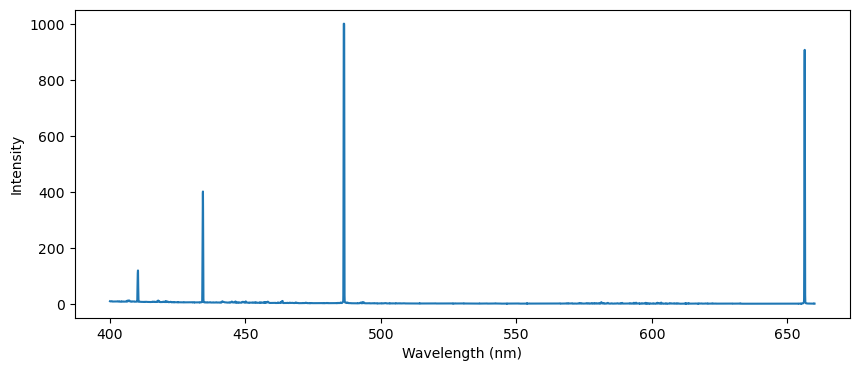

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(H_400_660['lambda'], H_400_660['intense'])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')


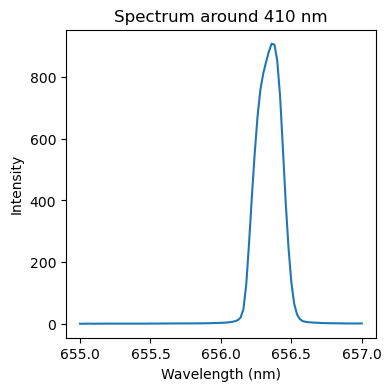

In [9]:
# 设置绘图范围
wavelength_range = (655, 657)

# 筛选出指定范围内的数据
subset = H_400_660[(H_400_660['lambda'] >= wavelength_range[0]) & (H_400_660['lambda'] <= wavelength_range[1])]

# 创建图形
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(subset['lambda'], subset['intense'])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Spectrum around 410 nm')

# 显示图形
plt.show()

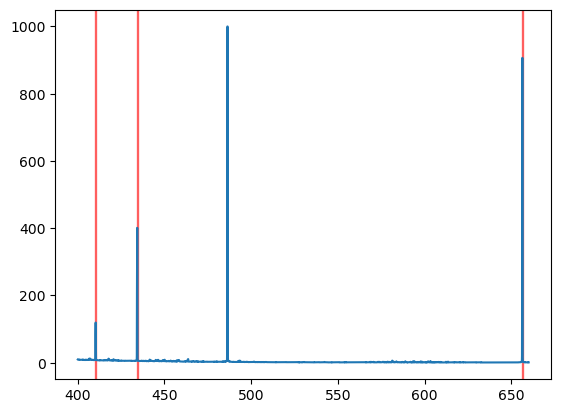

In [13]:
from scipy.signal import find_peaks

# 读取数据
data = H_400_660

# 找到所有的峰
peaks, _ = find_peaks(data['intense'],width=3,height=20)

# 提取高且宽的峰
wide_peaks = []
for peak in peaks:
    # 检查峰的宽度
    left = peak
    while left > 0 and data['intense'][left - 1] > data['intense'][left - 2]:
        left -= 1
    right = peak
    while right < len(data) - 1 and data['intense'][right + 1] > data['intense'][right + 2]:
        right += 1
    # 如果峰足够宽，则添加到宽峰列表中
    if right - left > 5:
        wide_peaks.append((left, right))

# 绘制原始数据
plt.plot(data['lambda'], data['intense'])

# 绘制高且宽的峰
for peak in wide_peaks:
    plt.axvspan(data['lambda'][peak[0]], data['lambda'][peak[1]], color='red', alpha=0.5)

# 显示图形
plt.show()